<a href="https://colab.research.google.com/github/Isanjalee/fyp/blob/ride_share_geo_analysis/RIDESHARE_GEO_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Ride Price Prediction Model**

## **Step 1: Data Preprocessing**


In [ ]:
import pandas as pd


file_path = '/content/drive/MyDrive/FYP - DATASET/rideshare_kaggle.csv'
data = pd.read_csv(file_path)




data = data[data['cab_type'] != 'Lyft']

data.head(100)




id     timestamp  hour  day  month  \
12   009e9c53-074d-43cf-aef2-0fbc7a47ed3d  1.543616e+09    22   30     11   
13   23f145da-f0c1-4d1f-a184-496bc003a7db  1.544698e+09    10   13     12   
14   357559cb-8c58-4278-a41a-e33b2e0997a3  1.544729e+09    19   13     12   
15   50ef1165-9d23-416c-a65c-18906207b295  1.545005e+09    23   16     12   
16   91c4861c-1780-42b0-bca1-bbd64a422cc3  1.544748e+09     0   14     12   
..                                    ...           ...   ...  ...    ...   
168  8e46fa0e-6af8-46c3-a397-e3d1202f7234  1.543893e+09     3    4     12   
169  91aca6a9-d049-4e9e-a1ff-6fcdb09df24c  1.543326e+09    13   27     11   
170  9f2a2774-9951-4b77-8320-bbb1e7c0e0d6  1.543211e+09     5   26     11   
171  a2ecc5c0-80ac-44e5-8979-04e386cd2a14  1.543458e+09     2   29     11   
172  b4b7b524-aead-49e4-a93e-9c792fcf4203  1.543514e+09    17   29     11   

                datetime          timezone     source         destination  \
12   2018-11-30 22:13:01  America/New_York  North End            West End   
13   2018-12-13 10:50:11  America/New_York  North End            West End   
14   2018-12-13 19:15:03  America/New_York  North End            West End   
15   2018-12-16 23:55:11  America/New_York  North End            West End   
16   2018-12-14 00:40:07  America/New_York  North End            West End   
..                   ...               ...        ...                 ...   
168  2018-12-04 03:07:56  America/New_York     Fenway  Financial District   
169  2018-11-27 13:42:22  America/New_York     Fenway  Financial District   
170  2018-11-26 05:36:27  America/New_York     Fenway  Financial District   
171  2018-11-29 02:14:08  America/New_York     Fenway  Financial District   
172  2018-11-29 17:48:03  America/New_York     Fenway  Financial District   

    cab_type  ... precipIntensityMax uvIndexTime  temperatureMin  \
12      Uber  ...             0.0003  1543593600           28.79   
13      Uber  ...             0.0001  1544716800           18.29   
14      Uber  ...             0.0001  1544716800           18.29   
15      Uber  ...             0.1252  1544979600           39.22   
16      Uber  ...             0.0001  1544716800           18.29   
..       ...  ...                ...         ...             ...   
168     Uber  ...             0.0004  1543852800           42.86   
169     Uber  ...             0.1429  1543338000           36.37   
170     Uber  ...             0.1245  1543251600           40.67   
171     Uber  ...             0.0000  1543420800           33.60   
172     Uber  ...             0.0000  1543510800           34.83   

     temperatureMinTime  temperatureMax  temperatureMaxTime  \
12           1543579200           42.52          1543600800   
13           1544688000           33.83          1544731200   
14           1544688000           33.83          1544731200   
15           1544954400           43.83          1544990400   
16           1544688000           33.83          1544731200   
..                  ...             ...                 ...   
168          1543896000           57.42          1543852800   
169          1543377600           47.06          1543320000   
170          1543233600           46.46          1543255200   
171          1543399200           42.70          1543438800   
172          1543550400           45.03          1543510800   

     apparentTemperatureMin  apparentTemperatureMinTime  \
12                    26.41                  1543575600   
13                    13.79                  1544688000   
14                    13.79                  1544688000   
15                    33.98                  1545019200   
16                    13.79                  1544688000   
..                      ...                         ...   
168                   39.73                  1543896000   
169                   32.40                  1543377600   
170                   37.45                  1543291200   
171                   30.

In [ ]:
# Handle missing values
data.dropna(inplace=True)

# Convert timestamps to datetime objects
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [ ]:
data

id                     timestamp  \
12      009e9c53-074d-43cf-aef2-0fbc7a47ed3d 1970-01-01 00:00:01.543615981   
13      23f145da-f0c1-4d1f-a184-496bc003a7db 1970-01-01 00:00:01.544698211   
14      357559cb-8c58-4278-a41a-e33b2e0997a3 1970-01-01 00:00:01.544728503   
15      50ef1165-9d23-416c-a65c-18906207b295 1970-01-01 00:00:01.545004511   
16      91c4861c-1780-42b0-bca1-bbd64a422cc3 1970-01-01 00:00:01.544748007   
...                                      ...                           ...   
693065  353e6566-b272-479e-a9c6-98bd6cb23f25 1970-01-01 00:00:01.543708386   
693066  616d3611-1820-450a-9845-a9ff304a4842 1970-01-01 00:00:01.543708386   
693067  633a3fc3-1f86-4b9e-9d48-2b7132112341 1970-01-01 00:00:01.543708386   
693069  727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e 1970-01-01 00:00:01.543708386   
693070  e7fdc087-fe86-40a5-a3c3-3b2a8badcbda 1970-01-01 00:00:01.543708386   

        hour  day  month             datetime          timezone     source  \
12        22   30     11  2018-11-30 22:13:01  America/New_York  North End   
13        10   13     12  2018-12-13 10:50:11  America/New_York  North End   
14        19   13     12  2018-12-13 19:15:03  America/New_York  North End   
15        23   16     12  2018-12-16 23:55:11  America/New_York  North End   
16         0   14     12  2018-12-14 00:40:07  America/New_York  North End   
...      ...  ...    ...                  ...               ...        ...   
693065    23    1     12  2018-12-01 23:53:05  America/New_York   West End   
693066    23    1     12  2018-12-01 23:53:05  America/New_York   West End   
693067    23    1     12  2018-12-01 23:53:05  America/New_York   West End   
693069    23    1     12  2018-12-01 23:53:05  America/New_York   West End   
693070    23    1     12  2018-12-01 23:53:05  America/New_York   West End   

       destination cab_type  ... precipIntensityMax uvIndexTime  \
12        West End     Uber  ...             0.0003  1543593600   
13        West End     Uber  ...             0.0001  1544716800   
14        West End     Uber  ...             0.0001  1544716800   
15        West End     Uber  ...             0.1252  1544979600   
16        West End     Uber  ...             0.0001  1544716800   
...            ...      ...  ...                ...         ...   
693065   North End     Uber  ...             0.0000  1543683600   
693066   North End     Uber  ...             0.0000  1543683600   
693067   North End     Uber  ...             0.0000  1543683600   
693069   North End     Uber  ...             0.0000  1543683600   
693070   North End     Uber  ...             0.0000  1543683600   

        temperatureMin  temperatureMinTime  temperatureMax  \
12               28.79          1543579200           42.52   
13               18.29          1544688000           33.83   
14               18.29          1544688000           33.83   
15               39.22          1544954400           43.83   
16               18.29          1544688000           33.83   
...                ...                 ...             ...   
693065           31.42          1543658400           44.76   
693066           31.42          1543658400           44.76   
693067           31.42          1543658400           44.76   
693069           31.42          1543658400           44.76   
693070           31.42          1543658400           44.76   

        temperatureMaxTime  apparentTemperatureMin  \
12              1543600800                   26.41   
13              1544731200                   13.79   
14              1544731200                   13.79   
15              1544990400                   33.98   
16              1544731200                   13.79   
...                    ...                     ...   
693065          1543690800                   27.77   
693066          1543690800                   27.77   
693067          1543690800                   27.77   
693069          1543690800                   27.77   
693070          15436908

In [ ]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330568 entries, 12 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id                           330568 non-null  object        
 1   timestamp                    330568 non-null  datetime64[ns]
 2   hour                         330568 non-null  int64         
 3   day                          330568 non-null  int64         
 4   month                        330568 non-null  int64         
 5   datetime                     330568 non-null  object        
 6   timezone                     330568 non-null  object        
 7   source                       330568 non-null  object        
 8   destination                  330568 non-null  object        
 9   cab_type                     330568 non-null  object        
 10  product_id                   330568 non-null  object        
 11  name                     

## **Step 2: Feature Selection and Engineering**

In [ ]:
# Select relevant features
selected_features = ['hour', 'day', 'distance', 'temperature']

# Create feature matrix (X) and target variable (y)
X = data[selected_features]
y = data['price']

Visualization:

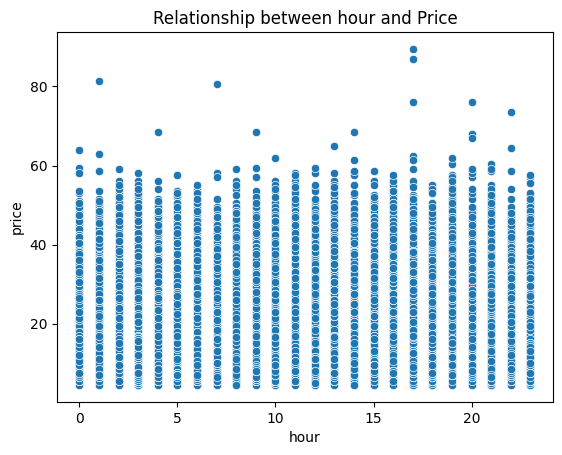

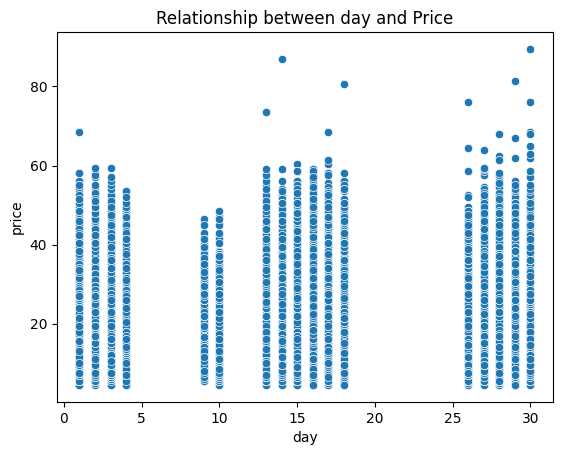

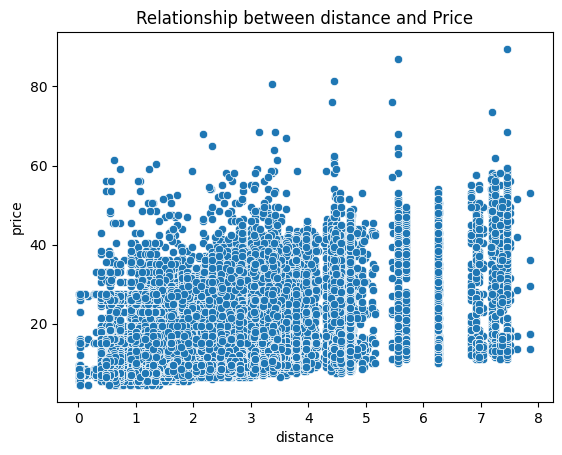

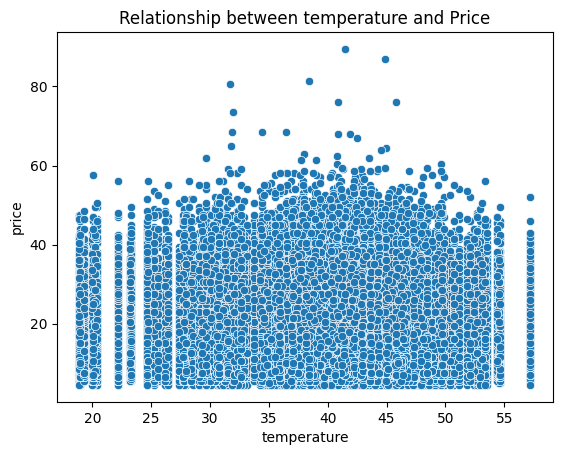

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


for feature in selected_features:
    sns.scatterplot(x=data[feature], y=data['price'])
    plt.title(f'Relationship between {feature} and Price')
    plt.show()


Correlation Matrix:

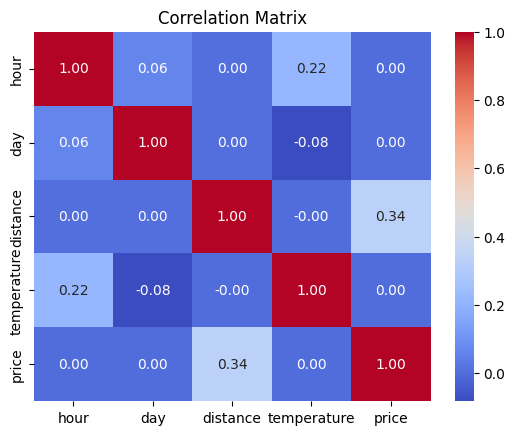

In [ ]:
correlation_matrix = data[selected_features + ['price']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


## **Step 3: Data Splitting**

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


print("\nFirst few rows of X_train:")
print(X_train.head())


X_train shape: (264454, 4)
X_test shape: (66114, 4)
y_train shape: (264454,)
y_test shape: (66114,)

First few rows of X_train:
        hour  day  distance  temperature
326701    18   16      2.46        42.82
227549     6    1      1.41        34.59
584275     9   26      3.31        41.60
314865     3   30      3.30        35.95
15704      5   18      2.34        36.27


Feature Importance in Tree-Based Models:

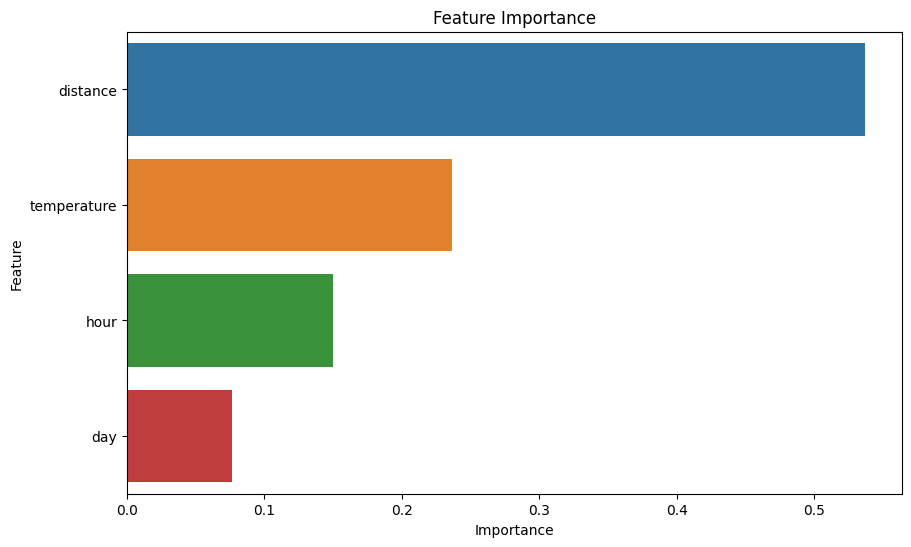

In [ ]:
from sklearn.ensemble import RandomForestRegressor


rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)


feature_importances = rf_model.feature_importances_


importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()


## **Step 4: Model Training**

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Make Predictions:

In [ ]:
# Use the trained model to make predictions on the test set
predictions = model.predict(X_test)


 Evaluate Model Performance:

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')


Mean Squared Error: 64.70602578348753
Mean Absolute Error: 6.690462861326979
R-squared: 0.10609556709237622


Visualize Predictions vs. Actual Values:

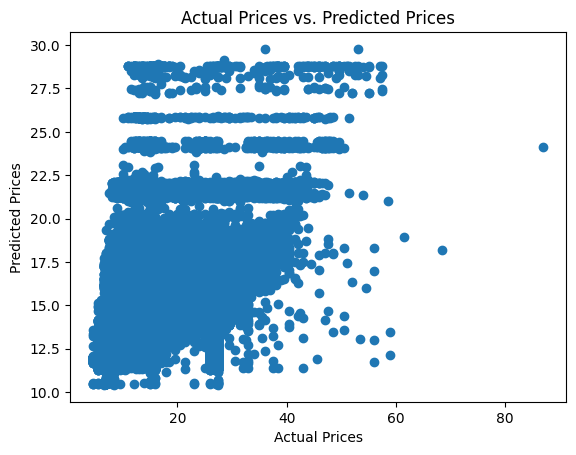

In [ ]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.show()

Explore Coefficients and Intercept:

In [ ]:
# Access the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')

Coefficients: [-2.86426515e-04  2.06714266e-03  2.46213207e+00  3.65288793e-03]
Intercept: 10.231775639554499


Permutation Importance:

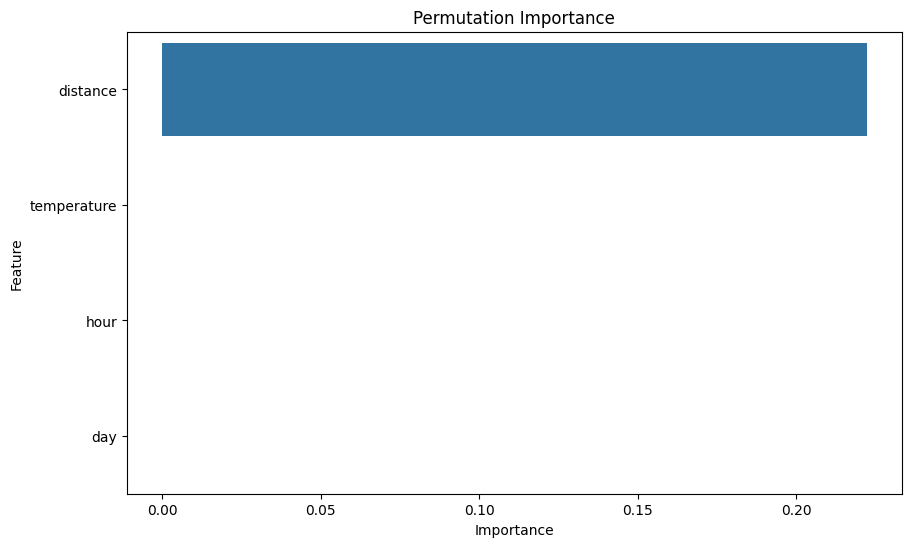

In [ ]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)

# Create a DataFrame to display permutation importances
perm_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': perm_importance.importances_mean})
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)

# Plot the permutation importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=perm_importance_df)
plt.title('Permutation Importance')
plt.show()


## **Step 5: Model Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error


predictions = model.predict(X_test)


mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 64.70602578348753


        Actual  Predicted
2255       5.5  12.662873
159538     8.0  14.244713
523077    18.5  17.815249
119846    20.5  15.641795
156332    23.5  16.963088
...        ...        ...
378335    11.0  19.296763
511453    12.0  17.995818
533138    34.0  18.937700
182496    10.5  14.662247
340425     8.5  15.666674

[66114 rows x 2 columns]


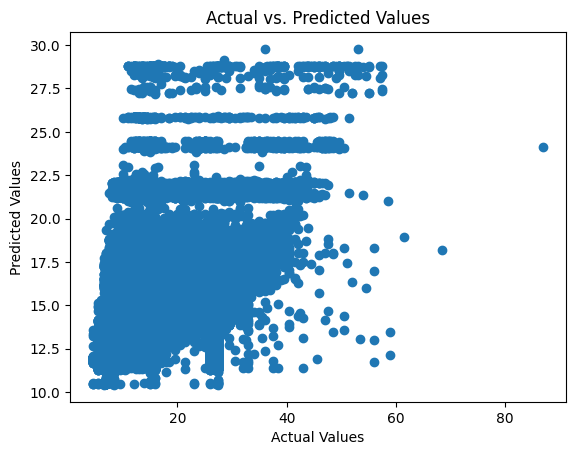

In [ ]:

results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(results)


plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()


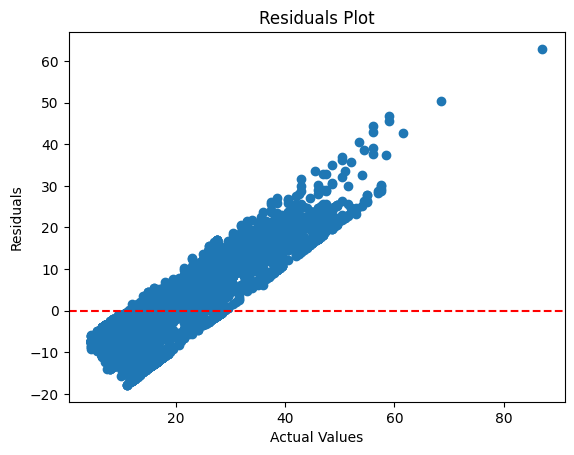

In [ ]:

residuals = y_test - predictions


plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

# **Demand Forecasting Model**

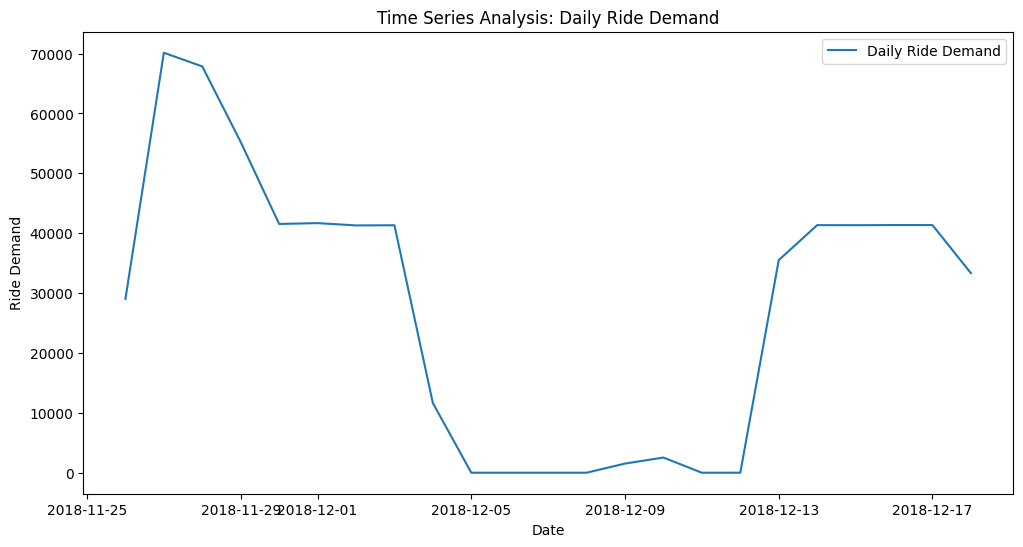

In [ ]:



datetime_column_name = 'datetime'


if datetime_column_name in data.columns:

    time_series_data = data.copy()

    time_series_data[datetime_column_name] = pd.to_datetime(time_series_data[datetime_column_name])
    time_series_data.set_index(datetime_column_name, inplace=True)


    daily_data = time_series_data.resample('D').size()


    plt.figure(figsize=(12, 6))
    plt.plot(daily_data.index, daily_data, label='Daily Ride Demand')
    plt.title('Time Series Analysis: Daily Ride Demand')
    plt.xlabel('Date')
    plt.ylabel('Ride Demand')
    plt.legend()
    plt.show()
else:
    print(f"The column '{datetime_column_name}' is not present in your dataset.")




/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


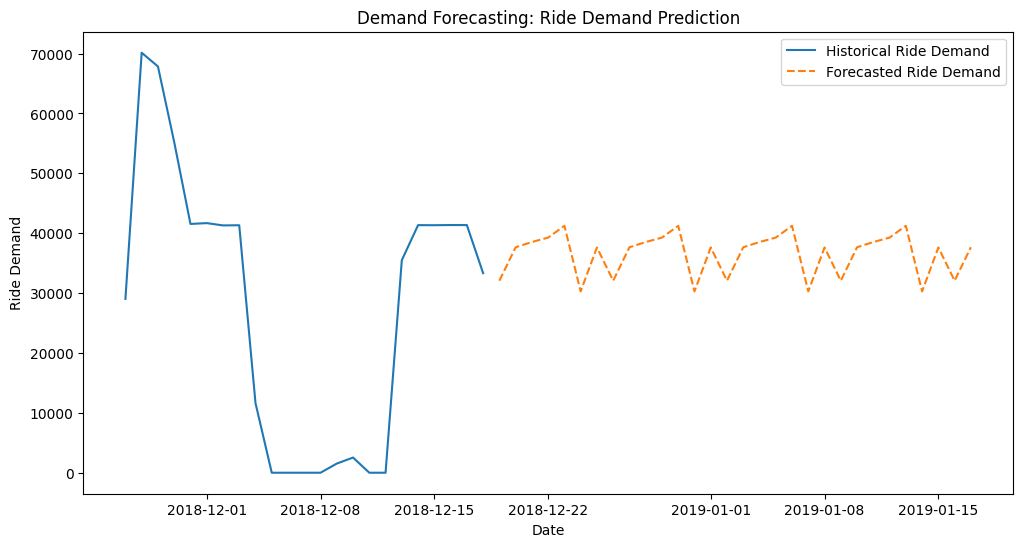

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


model = ExponentialSmoothing(daily_data, seasonal='add', seasonal_periods=7)
result = model.fit()


forecast_steps = 30
forecast = result.forecast(steps=forecast_steps)


plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data, label='Historical Ride Demand')
plt.plot(pd.date_range(start=daily_data.index[-1], periods=forecast_steps + 1, freq='D')[1:], forecast,
label='Forecasted Ride Demand', linestyle='--')
plt.title('Demand Forecasting: Ride Demand Prediction')
plt.xlabel('Date')
plt.ylabel('Ride Demand')
plt.legend()
plt.show()

# **Weather Impact Analysis**

In [ ]:
correlation_matrix = data[['temperature', 'precipIntensity', 'humidity', 'windSpeed', 'price']].corr()
correlation_matrix
plt.show()


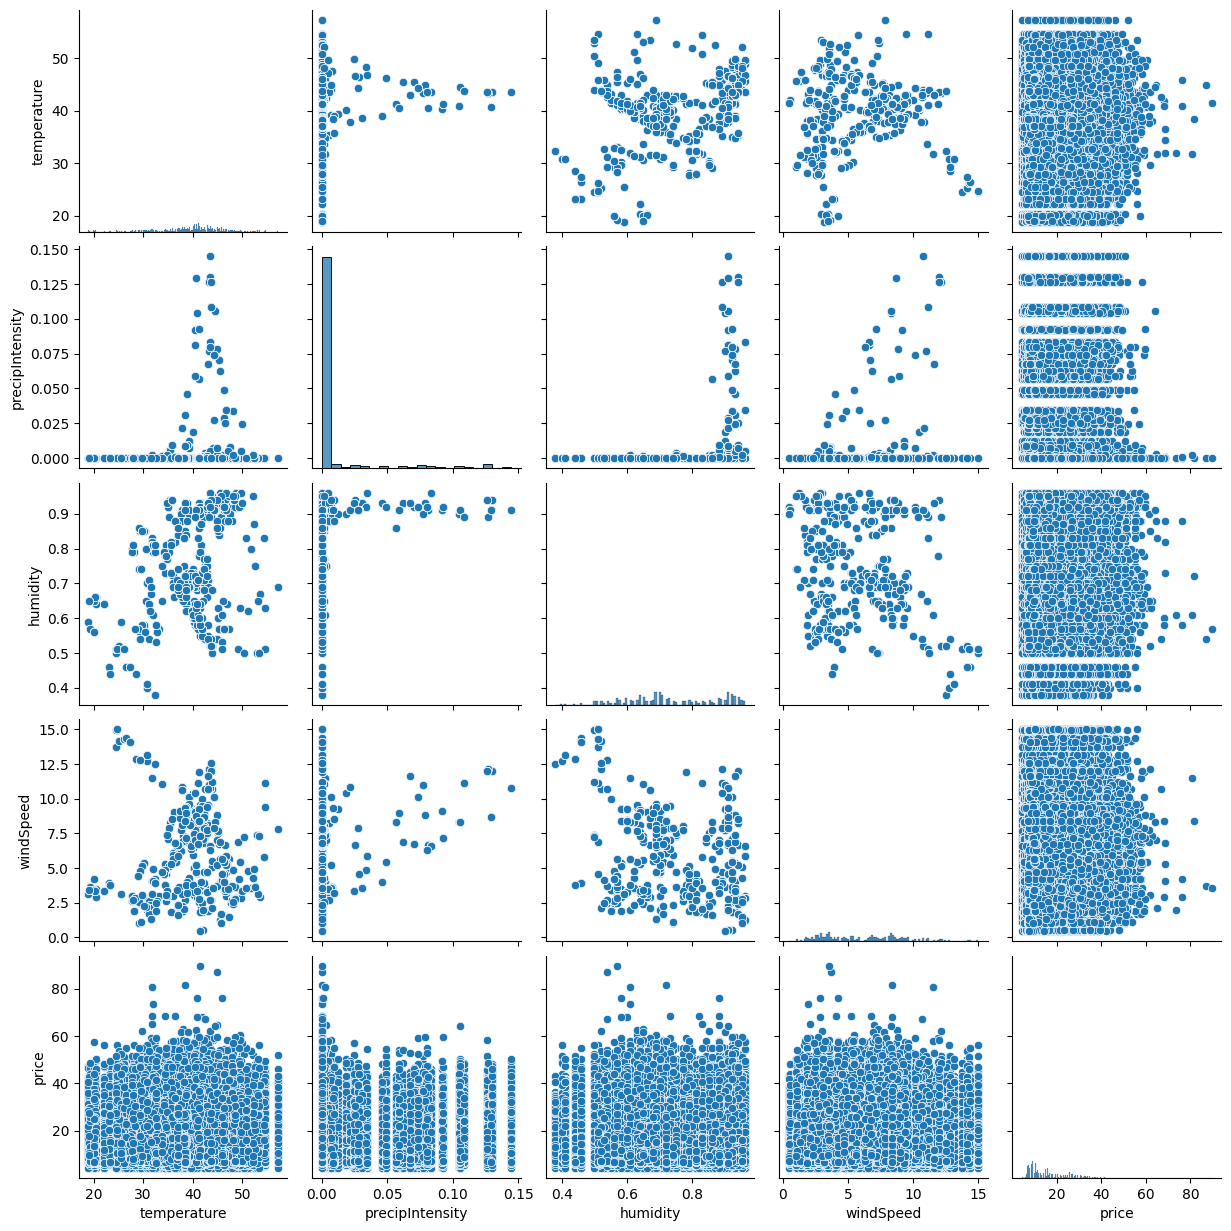

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data[['temperature', 'precipIntensity', 'humidity', 'windSpeed', 'price']])
plt.show()


In [ ]:
from scipy.stats import pearsonr

# Example: Perform Pearson correlation test
corr, p_value = pearsonr(data['temperature'], data['price'])
print(f'Correlation: {corr}, p-value: {p_value}')


Correlation: 0.0016974702103523275, p-value: 0.32908515690042434


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Example: Linear Regression
X = data[['temperature', 'precipIntensity', 'humidity', 'windSpeed']]
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 72.39181463730463


Mean Squared Error: 72.39181463730463


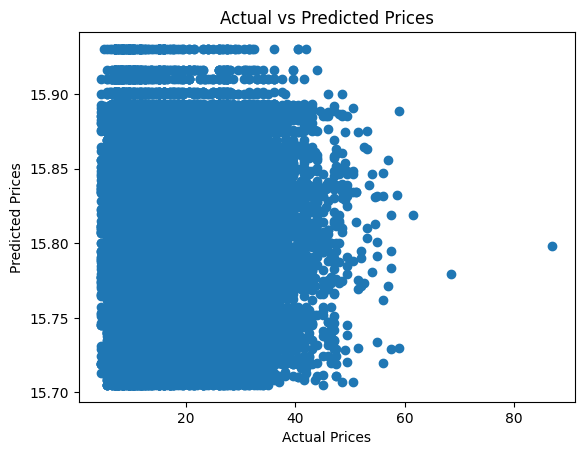

In [ ]:
# Select relevant features for the analysis
features = ['temperature', 'precipIntensity', 'humidity', 'windSpeed']
X = data[features]
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)


# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize the predicted vs actual prices
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()







Interpretation and Conclusion

A positive coefficient for a weather feature indicates that an increase in that feature is associated with an increase in ride prices.

A negative coefficient indicates the opposite.

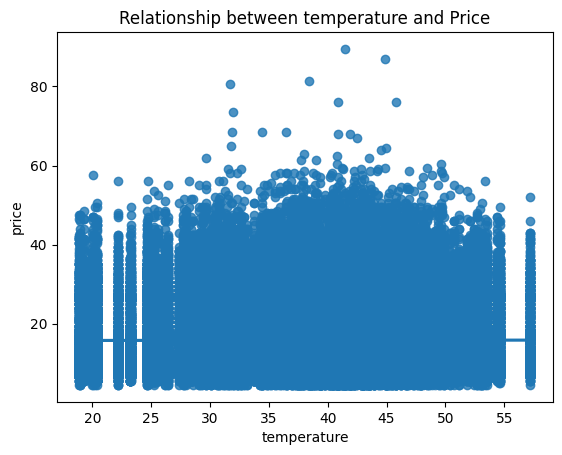

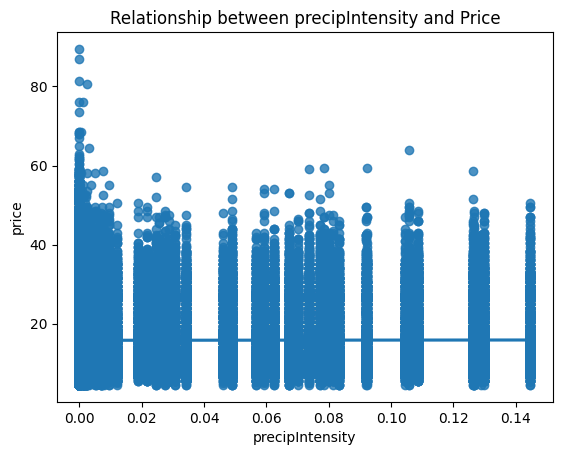

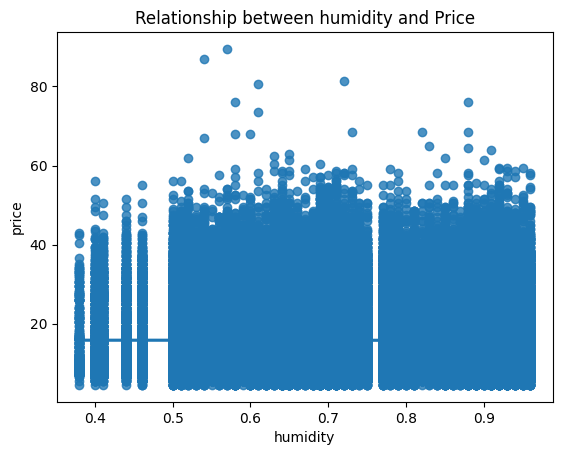

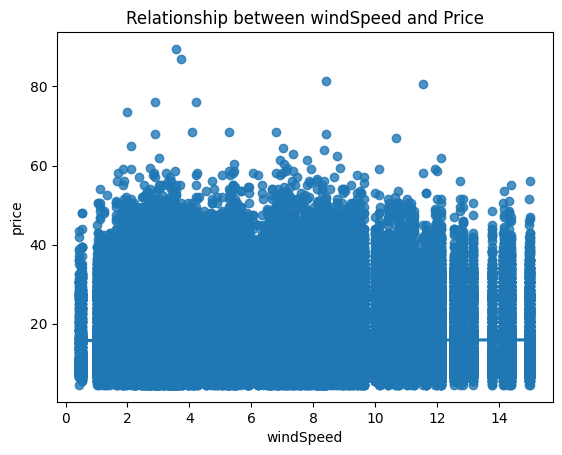

           Feature  Coefficient
0      temperature     0.003016
1  precipIntensity    -0.029592
2         humidity    -0.046501
3        windSpeed     0.013693


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create scatter plots with regression lines
for feature in ['temperature', 'precipIntensity', 'humidity', 'windSpeed']:
    sns.regplot(x=feature, y='price', data=data)
    plt.title(f'Relationship between {feature} and Price')
    plt.show()

# Print the coefficients of the model
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
print(coefficients)

# **Geospatial Analysis**

In [ ]:
data

id                     timestamp  \
12      009e9c53-074d-43cf-aef2-0fbc7a47ed3d 1970-01-01 00:00:01.543615981   
13      23f145da-f0c1-4d1f-a184-496bc003a7db 1970-01-01 00:00:01.544698211   
14      357559cb-8c58-4278-a41a-e33b2e0997a3 1970-01-01 00:00:01.544728503   
15      50ef1165-9d23-416c-a65c-18906207b295 1970-01-01 00:00:01.545004511   
16      91c4861c-1780-42b0-bca1-bbd64a422cc3 1970-01-01 00:00:01.544748007   
...                                      ...                           ...   
693065  353e6566-b272-479e-a9c6-98bd6cb23f25 1970-01-01 00:00:01.543708386   
693066  616d3611-1820-450a-9845-a9ff304a4842 1970-01-01 00:00:01.543708386   
693067  633a3fc3-1f86-4b9e-9d48-2b7132112341 1970-01-01 00:00:01.543708386   
693069  727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e 1970-01-01 00:00:01.543708386   
693070  e7fdc087-fe86-40a5-a3c3-3b2a8badcbda 1970-01-01 00:00:01.543708386   

        hour  day  month             datetime          timezone     source  \
12        22   30     11  2018-11-30 22:13:01  America/New_York  North End   
13        10   13     12  2018-12-13 10:50:11  America/New_York  North End   
14        19   13     12  2018-12-13 19:15:03  America/New_York  North End   
15        23   16     12  2018-12-16 23:55:11  America/New_York  North End   
16         0   14     12  2018-12-14 00:40:07  America/New_York  North End   
...      ...  ...    ...                  ...               ...        ...   
693065    23    1     12  2018-12-01 23:53:05  America/New_York   West End   
693066    23    1     12  2018-12-01 23:53:05  America/New_York   West End   
693067    23    1     12  2018-12-01 23:53:05  America/New_York   West End   
693069    23    1     12  2018-12-01 23:53:05  America/New_York   West End   
693070    23    1     12  2018-12-01 23:53:05  America/New_York   West End   

       destination cab_type  ... uvIndexTime temperatureMin  \
12        West End     Uber  ...  1543593600          28.79   
13        West End     Uber  ...  1544716800          18.29   
14        West End     Uber  ...  1544716800          18.29   
15        West End     Uber  ...  1544979600          39.22   
16        West End     Uber  ...  1544716800          18.29   
...            ...      ...  ...         ...            ...   
693065   North End     Uber  ...  1543683600          31.42   
693066   North End     Uber  ...  1543683600          31.42   
693067   North End     Uber  ...  1543683600          31.42   
693069   North End     Uber  ...  1543683600          31.42   
693070   North End     Uber  ...  1543683600          31.42   

        temperatureMinTime  temperatureMax  temperatureMaxTime  \
12              1543579200           42.52          1543600800   
13              1544688000           33.83          1544731200   
14              1544688000           33.83          1544731200   
15              1544954400           43.83          1544990400   
16              1544688000           33.83          1544731200   
...                    ...             ...                 ...   
693065          1543658400           44.76          1543690800   
693066          1543658400           44.76          1543690800   
693067          1543658400           44.76          1543690800   
693069          1543658400           44.76          1543690800   
693070          1543658400           44.76          1543690800   

        apparentTemperatureMin  apparentTemperatureMinTime  \
12                       26.41                  1543575600   
13                       13.79                  1544688000   
14                       13.79                  1544688000   
15                       33.98                  1545019200   
16                       13.79                  1544688000   
...                        ...                         ...   
693065                   27.77                  1543658400   
693066                   27.77                  1543658400   
693067                   27.77                  1543658400  

## **Visualization on Map:**

In [ ]:
import folium
from folium.plugins import HeatMap

# Create a map with pickup locations
map_pickup = folium.Map(location=[data['latitude'].mean(), data['longitude'].mean()], zoom_start=12)
HeatMap(data[['latitude', 'longitude']]).add_to(map_pickup)
map_pickup


In [ ]:
import folium
from folium.plugins import HeatMap

# Sample a fraction of data for visualization to reduce load
sampled_data = data.sample(frac=0.1)

# Create a map centered around an average location
map = folium.Map(location=[sampled_data['latitude'].mean(), sampled_data['longitude'].mean()], zoom_start=11)

# Add heat
heat_map = HeatMap(zip(sampled_data['latitude'], sampled_data['longitude']), radius=10)
map.add_child(heat_map)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np

target = 'price'

X_train, X_test, y_train, y_test = train_test_split(data[['latitude', 'longitude', 'hour', 'day', 'month']], data[target], test_size=0.3)

model = RandomForestRegressor()
model.fit(X_train, y_train)


predictions = model.predict(X_test)

predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error: {rmse}")


plt.scatter(y_test, predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

NameError: ignored

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import pandas as pd  # Make sure to import pandas

# Convert 'datetime' column to datetime data type
data['datetime'] = pd.to_datetime(data['datetime'])

# Feature Engineering: Creating new time-related features
data['weekday'] = data['datetime'].dt.dayofweek
data['hour_of_day'] = data['datetime'].dt.hour

# Data Preprocessing: Standardizing features
scaler = StandardScaler()
X = scaler.fit_transform(data[['latitude', 'longitude', 'hour', 'day', 'month', 'weekday', 'hour_of_day']])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, data[target], test_size=0.3)

# Hyperparameter Tuning
param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20, 30]}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best Model
best_model = grid_search.best_estimator_

# Predict and Evaluate
predictions = best_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(f"Optimized RMSE: {rmse}")


NameError: ignored

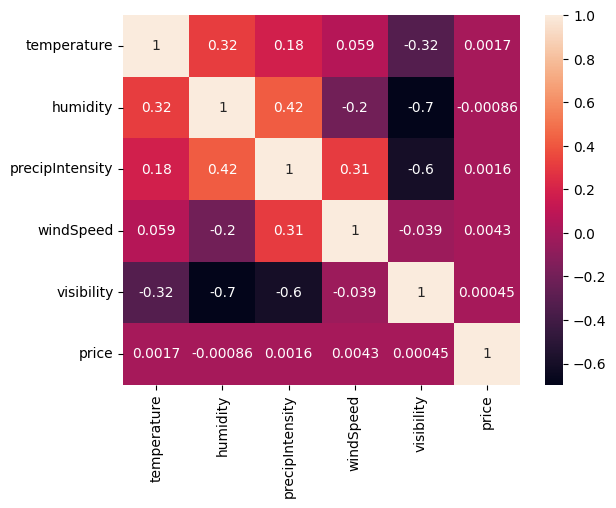

In [ ]:
import seaborn as sns

# Choose weather conditions and a demand metric
weather_conditions = ['temperature', 'humidity', 'precipIntensity', 'windSpeed', 'visibility']
demand_metric = 'price'

# Correlation heatmap
correlation_data = data[weather_conditions + [demand_metric]]
correlation_matrix = correlation_data.corr()
sns.heatmap(correlation_matrix, annot=True)

plt.show()


<ipython-input-28-fe05679d94c0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  route_weather_data = data.groupby(['source', 'destination'] + weather_conditions).mean().reset_index()


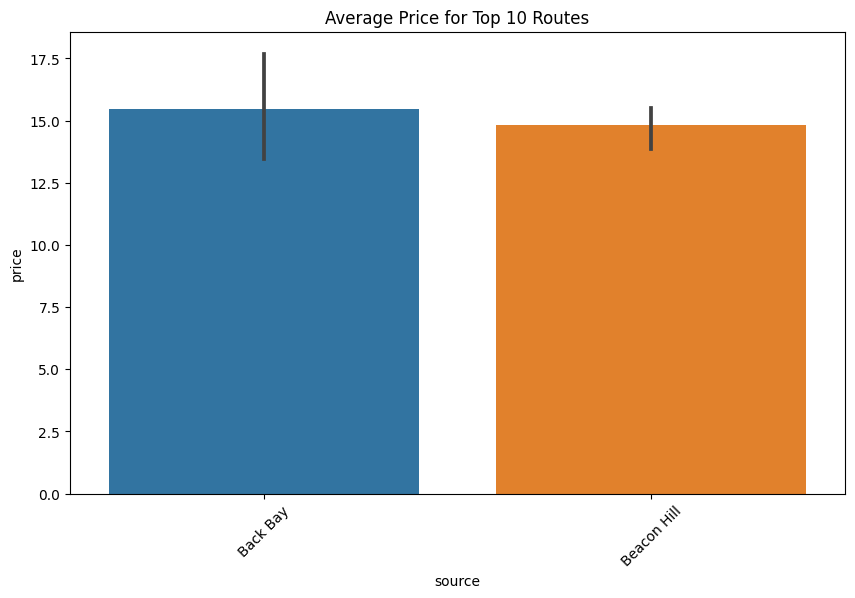

In [ ]:


route_weather_data = data.groupby(['source', 'destination'] + weather_conditions).mean().reset_index()


route_avg_price = route_weather_data.groupby(['source', 'destination'])['price'].mean().reset_index()

# Bar plot (Sample visualization)
plt.figure(figsize=(10,6))
sns.barplot(x="source", y="price", data=route_avg_price.head(10))
plt.xticks(rotation=45)
plt.title("Average Price for Top 10 Routes")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


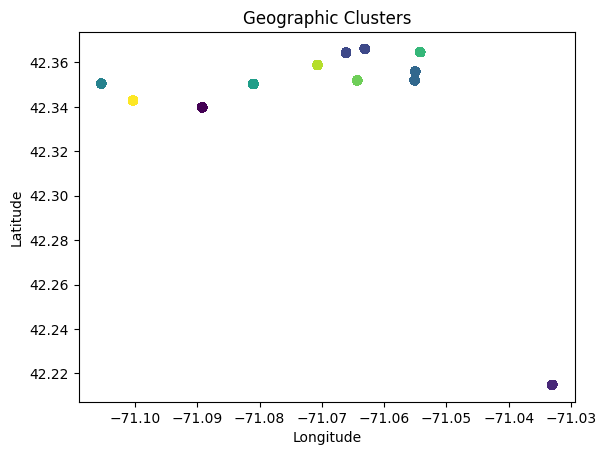

In [ ]:
from sklearn.cluster import KMeans

# Use KMeans for clustering
coords = data[['latitude', 'longitude']]
kmeans = KMeans(n_clusters=10)
data['cluster'] = kmeans.fit_predict(coords)

plt.scatter(data['longitude'], data['latitude'], c=data['cluster'], cmap='viridis')
plt.title("Geographic Clusters")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# **Surge Pricing Analysis**

In [ ]:
correlation_matrix = data[['surge_multiplier', 'temperature', 'hour']].corr()


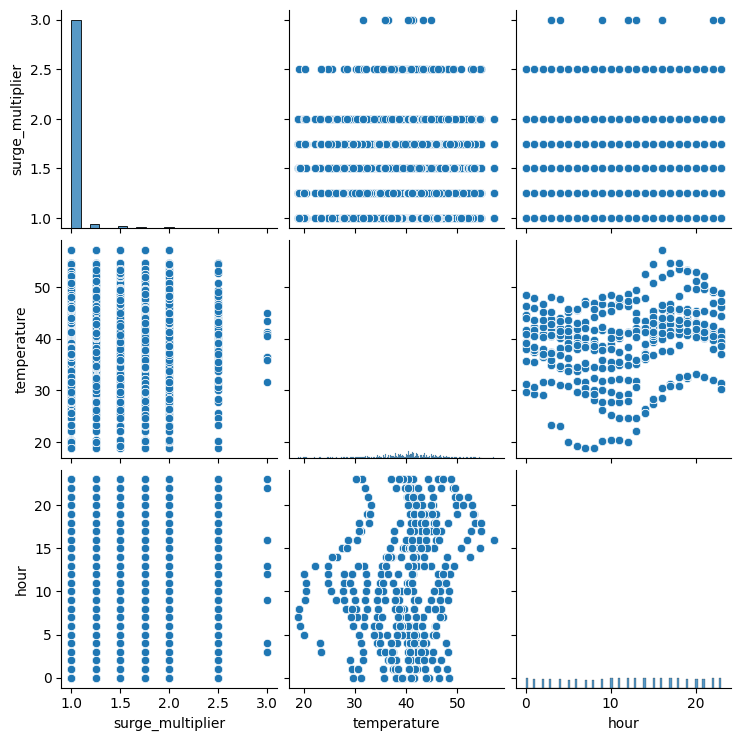

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data[['surge_multiplier', 'temperature', 'hour']])
plt.show()

In [ ]:
# Select relevant columns for correlation analysis
columns_of_interest = ['surge_multiplier', 'temperature', 'hour']

# Create a correlation matrix
correlation_matrix = data[columns_of_interest].corr()

# Display the correlation matrix
print(correlation_matrix)


                  surge_multiplier  temperature      hour
surge_multiplier          1.000000    -0.001594 -0.000067
temperature              -0.001594     1.000000  0.218829
hour                     -0.000067     0.218829  1.000000


# **Time-of-Day Analysis**

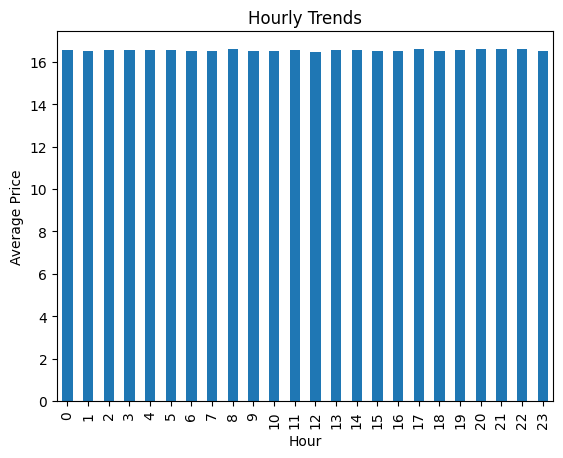

In [ ]:
# Hourly Trends Analysis
hourly_trends = data.groupby('hour')['price'].mean()

# Plotting
hourly_trends.plot(kind='bar', xlabel='Hour', ylabel='Average Price', title='Hourly Trends')
plt.show()


# **Weather Forecast Integration**

# **Anomaly Detection**